In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [14]:
data = pd.read_csv('진짜가중평균.csv',engine='python',encoding='utf-8-sig')
data1 = pd.read_csv('직전년도.csv',engine='python',encoding='utf-8-sig')
data2 = pd.read_csv('프로기록있는선수들통과11.csv') # 대회년도 평균내서 가져오기 위한 용도
key = pd.read_csv('afterdrop.csv',engine='python',encoding='utf-8-sig')

In [15]:
data2 = data2.reset_index(drop=True)
year = data2.groupby(['선수명','대학교']).mean()
data5 =pd.merge(data,year['대회년도'],how='left',on='선수명').dropna(axis=0).reset_index(drop=True)
data3 =pd.merge(data5,data1[['선수명','키','EFF']],how='left',on='선수명').dropna(axis=0).reset_index(drop=True)
data3 = data3.drop(['Unnamed: 0'], axis=1)
final = (data3.drop_duplicates(['선수명'])).reset_index(drop=True)
final_under2003 = (final.loc[(final['대회년도'] > 2003)]).reset_index(drop=True)

In [16]:
final_under2003

,선수명,대학교,경기수,전체 출전시간,득점 전체,득점 평균,2점슛 성공,2점슛 시도,2점슛 성공률,3점슛 성공,...,굿디펜스,속공,FBF,턴오버,팀 리바운드,팀 턴오버,년수,대회년도,키,EFF
0,강병진,건국대학교,3.6,421.785000,10.3,2.2,3.2,8.2,4.030,1.2,...,1.6,0.0,0.0,4.0,0.0,0.0,3.0,2009.000000,193.0,81.0
1,강상재,고려대학교,18.9,4205.098333,233.0,22.9,90.9,162.4,10.807,10.4,...,9.3,8.9,2.6,28.4,0.8,0.0,4.0,2014.500000,200.0,807.0
2,강우형,경희대학교,6.0,1391.380000,32.5,4.0,11.0,13.6,7.320,2.5,...,5.4,0.0,0.0,7.5,0.0,0.0,3.0,2004.333333,191.0,44.0
3,강호연,명지대학교,16.6,2634.055000,107.6,13.8,13.9,33.6,7.957,25.3,...,6.4,4.2,1.7,16.3,11.4,3.7,4.0,2013.500000,188.0,102.0
4,곽동기,상명대학교,19.2,4611.265000,227.8,19.5,90.9,168.1,8.164,4.0,...,1.5,2.3,0.7,47.5,17.7,4.7,4.0,2017.500000,193.0,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,허효진,중앙대학교,6.1,1244.990000,62.8,9.9,18.3,33.0,5.559,6.5,...,3.8,0.0,0.0,6.5,0.0,0.0,4.0,2004.500000,190.0,311.0
264,홍경기,고려대학교,4.0,1365.050000,51.0,12.0,8.0,14.0,5.710,10.0,...,1.0,0.0,0.0,10.0,0.0,0.0,1.0,2010.000000,184.0,362.0
265,홍석민,동국대학교,18.7,2765.428333,90.2,9.7,27.4,58.0,10.248,11.1,...,2.8,1.1,0.6,12.9,1.6,0.7,4.0,2015.333333,197.0,2.0
266,홍성헌,성균관대학교,4.1,1235.015000,59.3,14.3,22.8,54.2,4.430,0.0,...,7.2,0.0,0.0,6.3,0.0,0.0,3.0,2005.000000,195.0,-1.0


In [19]:
final_under2003_half_under200 = pd.DataFrame(final_under2003)

for idx, row in final_under2003_half_under200.iterrows():
    if row['EFF'] < 200 and 0.5 <= np.random.uniform(0, 1): final_under2003_half_under200 = final_under2003_half_under200.drop(idx, axis=0)
final_under2003_half_under200

,선수명,대학교,경기수,전체 출전시간,득점 전체,득점 평균,2점슛 성공,2점슛 시도,2점슛 성공률,3점슛 성공,...,굿디펜스,속공,FBF,턴오버,팀 리바운드,팀 턴오버,년수,대회년도,키,EFF
1,강상재,고려대학교,18.9,4205.098333,233.0,22.9,90.9,162.4,10.807,10.4,...,9.3,8.9,2.6,28.4,0.8,0.0,4.0,2014.500000,200.0,807.0
2,강우형,경희대학교,6.0,1391.380000,32.5,4.0,11.0,13.6,7.320,2.5,...,5.4,0.0,0.0,7.5,0.0,0.0,3.0,2004.333333,191.0,44.0
3,강호연,명지대학교,16.6,2634.055000,107.6,13.8,13.9,33.6,7.957,25.3,...,6.4,4.2,1.7,16.3,11.4,3.7,4.0,2013.500000,188.0,102.0
4,곽동기,상명대학교,19.2,4611.265000,227.8,19.5,90.9,168.1,8.164,4.0,...,1.5,2.3,0.7,47.5,17.7,4.7,4.0,2017.500000,193.0,185.0
7,권시현,단국대학교,21.1,6670.516667,348.8,30.8,92.9,196.5,9.776,38.7,...,11.8,27.3,14.2,48.9,12.3,6.7,4.0,2016.500000,184.0,297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,허효진,중앙대학교,6.1,1244.990000,62.8,9.9,18.3,33.0,5.559,6.5,...,3.8,0.0,0.0,6.5,0.0,0.0,4.0,2004.500000,190.0,311.0
264,홍경기,고려대학교,4.0,1365.050000,51.0,12.0,8.0,14.0,5.710,10.0,...,1.0,0.0,0.0,10.0,0.0,0.0,1.0,2010.000000,184.0,362.0
265,홍석민,동국대학교,18.7,2765.428333,90.2,9.7,27.4,58.0,10.248,11.1,...,2.8,1.1,0.6,12.9,1.6,0.7,4.0,2015.333333,197.0,2.0
266,홍성헌,성균관대학교,4.1,1235.015000,59.3,14.3,22.8,54.2,4.430,0.0,...,7.2,0.0,0.0,6.3,0.0,0.0,3.0,2005.000000,195.0,-1.0


In [20]:
df_x_whole = final_under2003.drop(['EFF','년수', '선수명','대학교','대회년도'],axis=1)
df_y_whole = final_under2003['EFF']

In [21]:
df_x = final_under2003_half_under200.drop(['EFF','년수', '선수명','대학교','대회년도'],axis=1)
df_y = final_under2003_half_under200['EFF']

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, random_state = 20, test_size = 0.30)
reg_Lasso = Lasso(alpha = 30)
reg_Lasso.fit(x_train, y_train)
y_pred_Lasso = reg_Lasso.predict(x_valid)
r2Lasso = r2_score(y_valid,y_pred_Lasso)
print(r2Lasso) # r-squred 값

0.25119575399978344


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
coef = reg_Lasso.coef_.nonzero()[0]
reg_Lasso.coef_

array([ -8.6707545 ,   0.03350105,   3.00564254,  -0.50493439,
        16.7937736 , -10.52144606, -16.78021251,  -0.        ,
        -1.26025514,   0.17475633,  -0.        ,  -0.71215706,
       -14.82420885,  -8.00303198,   2.06090352,  -0.        ,
         1.2848438 ,  -0.        ,   3.93558007,   2.58536532,
        -0.        ,  -0.        ,  -3.1450419 ,   2.7784986 ,
         0.        ,   0.        ,   6.95588129,  -6.66623803,
        -0.        ,  -0.        ,   0.        ,  -0.        ,
        -0.        ])

In [26]:
len(coef)

20

Text(0,0.5,'prediction')

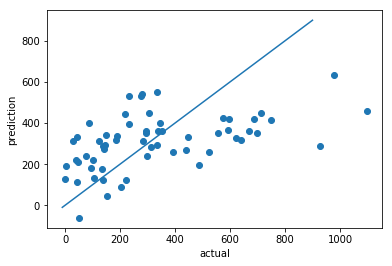

In [27]:
plt.scatter(y_valid,y_pred_Lasso)
plt.plot([-10, 900], [-10, 900])
plt.xlabel("actual")
plt.ylabel("prediction")

In [28]:
y_pred_whole_Lasso = reg_Lasso.predict(df_x_whole)
r2Lasso_whole = r2_score(df_y_whole,y_pred_whole_Lasso)
r2Lasso_whole

0.2879478365686101

Text(0,0.5,'prediction')

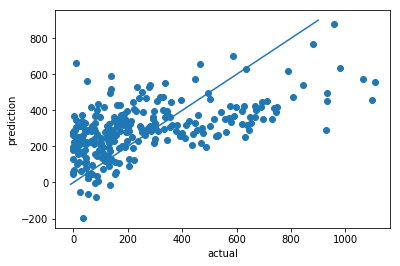

In [29]:
plt.scatter(df_y_whole,y_pred_whole_Lasso)
plt.plot([-10, 900], [-10, 900])
plt.xlabel("actual")
plt.ylabel("prediction")

In [30]:
MSE = mean_squared_error(df_y_whole, y_pred_whole_Lasso)
RMSE = MSE ** (1/2)
print(RMSE) # RMSE값

207.95922224484428
